# Sea level Predictor

### 1. Use Pandas to import the data from epa-sea-level.csv.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [133]:
df = pd.read_csv("epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


### 2. Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

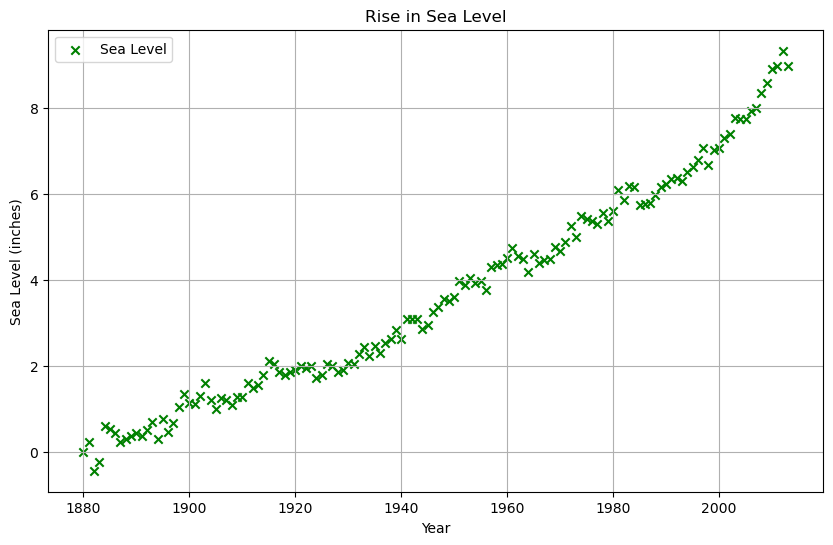

In [135]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], marker='x', color='green', label='Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.grid(True)
plt.legend()
plt.show()

### 3. Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [137]:
from scipy.stats import linregress
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

In [138]:
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.0630445840121348
Intercept: -119.06594196773978


In [139]:
first_year = df.iloc[0]['Year']
first_year

1880.0

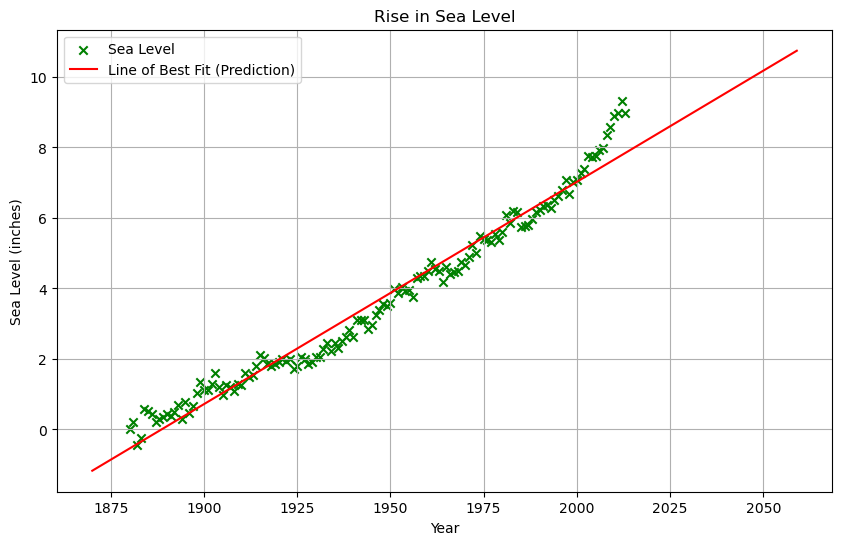

In [140]:
# Create a range of years to include 2050
years_extended = list(range(int(first_year)-10, 2050+10))

# Calculate the corresponding sea level values for the line of best fit
sea_levels_extended = [slope * year + intercept for year in years_extended]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='x', color='green', label='Sea Level')

plt.plot(years_extended, sea_levels_extended, color='red', label='Line of Best Fit (Prediction)')

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.grid(True)
plt.legend()
plt.show()

In [141]:
sea_lvl_2050 = slope * 2050 + intercept
sea_lvl_2050

10.175455257136548

### 4. Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [143]:
df1 = df[df.Year >= 2000]
x = df1['Year']
y = df1['CSIRO Adjusted Sea Level']

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

In [144]:
x

120    2000
121    2001
122    2002
123    2003
124    2004
125    2005
126    2006
127    2007
128    2008
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, dtype: int64

In [145]:
print(f"New Slope: {slope}")
print(f"New Intercept: {intercept}")

New Slope: 0.1664272733318682
New Intercept: -325.7934668059649


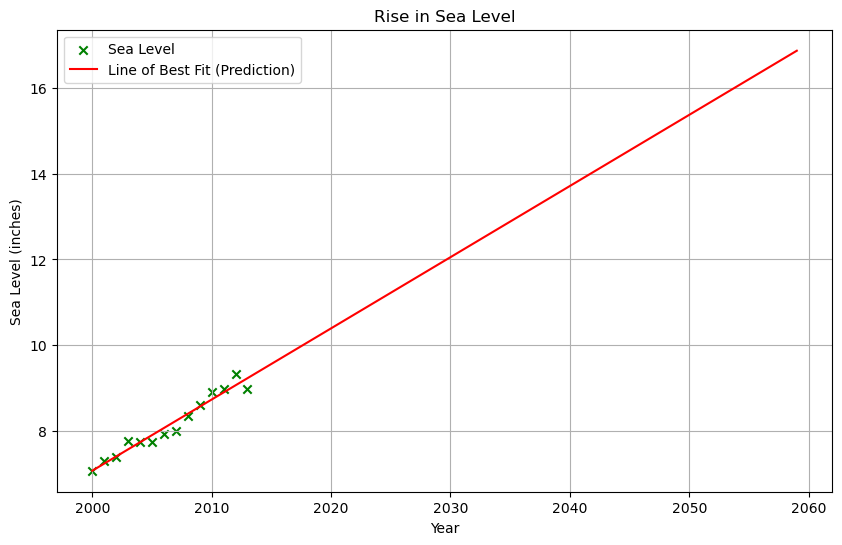

In [146]:
# Create a range of years to include 2050
years_extended = list(range(2000, 2060))

# Calculate the corresponding sea level values for the line of best fit
sea_levels_extended = [slope * year + intercept for year in years_extended]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='x', color='green', label='Sea Level')

plt.plot(years_extended, sea_levels_extended, color='red', label='Line of Best Fit (Prediction)')

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.grid(True)
plt.legend()
plt.show()

In [147]:
sea_lvl_2050 = slope * 2050 + intercept
sea_lvl_2050

15.382443524364874

### 5. The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

**DONE**